In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
df=pd.read_csv('/content/new_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             180 non-null    float64
 1   RestingBP       182 non-null    float64
 2   Cholesterol     180 non-null    float64
 3   FastingBS>120   200 non-null    object 
 4   ExerciseAngina  200 non-null    object 
 5   HeartDisease    182 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.5+ KB


In [26]:
df.describe()

,Age,RestingBP,Cholesterol,HeartDisease
count,180.000000,182.000000,180.000000,182.000000
mean,58.010268,140.828300,234.813242,0.626757
std,21.679140,39.489199,63.669822,0.754086
min,30.000000,90.000000,151.000000,0.000000
25%,42.000000,112.000000,190.000000,0.000000
50%,53.000000,136.000000,229.000000,1.000000
75%,69.000000,159.250000,265.000000,1.000000
max,125.984818,265.075054,434.638361,3.006974


In [27]:
print(df.isnull().sum())

Age               20
RestingBP         18
Cholesterol       20
FastingBS>120      0
ExerciseAngina     0
HeartDisease      18
dtype: int64


In [28]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['RestingBP'].fillna(df['RestingBP'].median(), inplace=True)
df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)

/tmp/ipython-input-28-2934712570.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-28-2934712570.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [29]:
df.drop_duplicates(inplace=True)


In [30]:
label_enc = LabelEncoder()
df['FastingBS>120'] = label_enc.fit_transform(df['FastingBS>120'].astype(str))
df['ExerciseAngina'] = label_enc.fit_transform(df['ExerciseAngina'].astype(str))

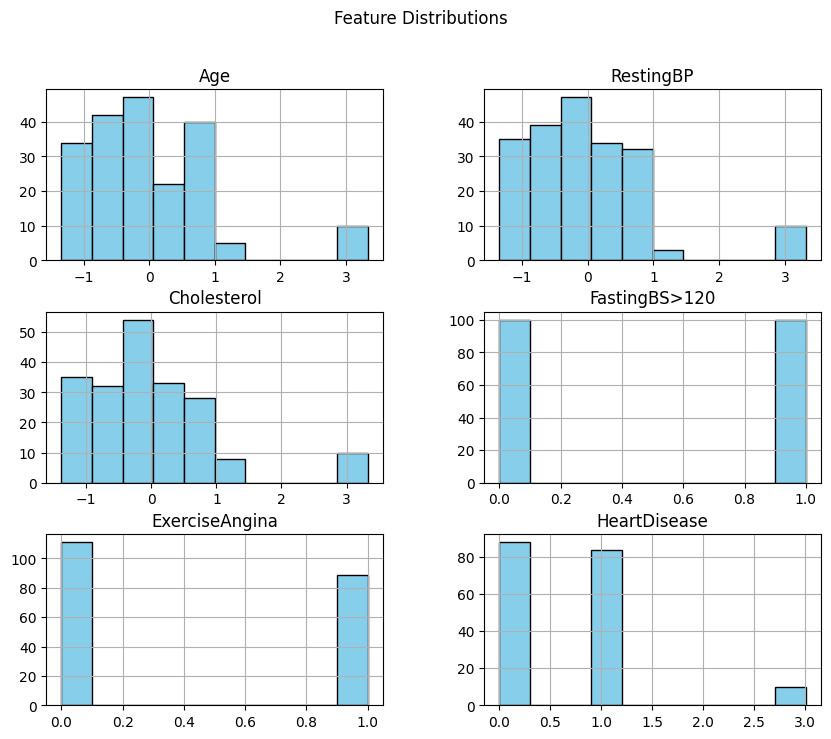

In [34]:
df.hist(figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

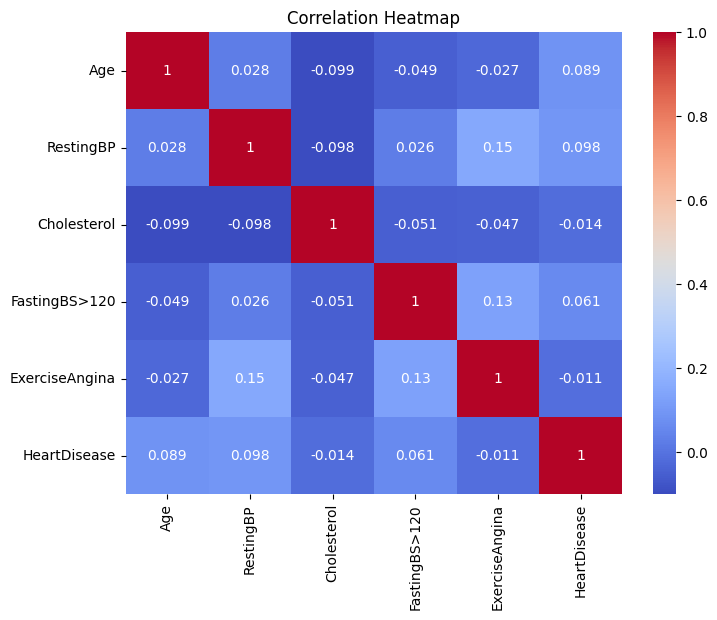

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [46]:
df['HeartDisease'] = df['HeartDisease'].astype(int)


In [47]:

df['HeartDisease'].fillna(df['HeartDisease'].mode()[0], inplace=True)


df['HeartDisease'] = df['HeartDisease'].astype(int)


/tmp/ipython-input-47-872717789.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HeartDisease'].fillna(df['HeartDisease'].mode()[0], inplace=True)


In [48]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [51]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred = model.predict(X_test)

In [53]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.575

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.59      0.62        22
           1       0.50      0.62      0.56        16
           3       0.00      0.00      0.00         2

    accuracy                           0.57        40
   macro avg       0.38      0.41      0.39        40
weighted avg       0.56      0.57      0.56        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


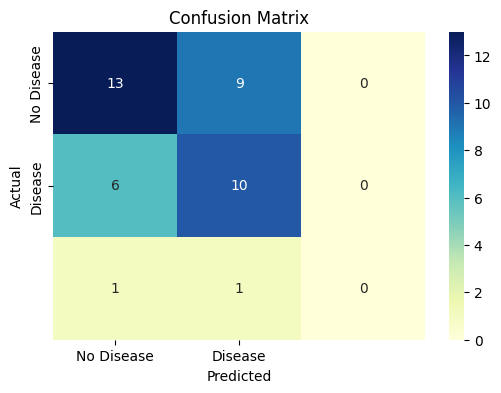

In [54]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

/tmp/ipython-input-55-2502755789.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x="HeartDisease", palette="Set2")
/tmp/ipython-input-55-2502755789.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x="HeartDisease", palette="Set2")
/tmp/ipython-input-55-2502755789.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x="HeartDisease", palette="Set2")


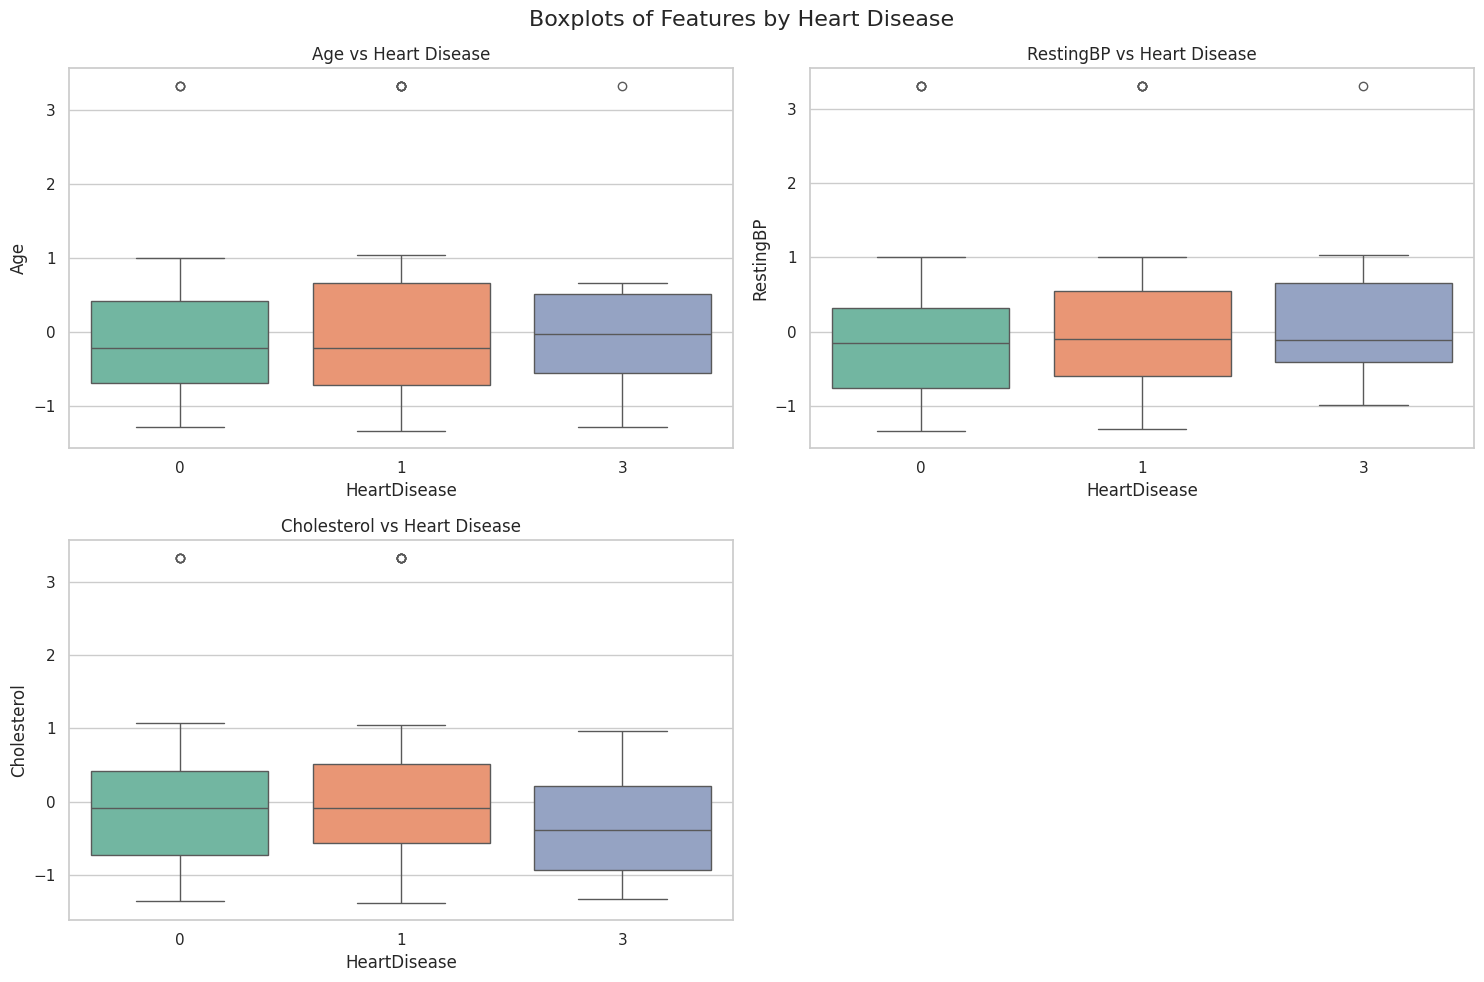

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'RestingBP', 'Cholesterol']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, y=col, x="HeartDisease", palette="Set2")
    plt.title(f"{col} vs Heart Disease")
plt.suptitle("Boxplots of Features by Heart Disease", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipython-input-56-1930547296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="HeartDisease", palette="pastel")


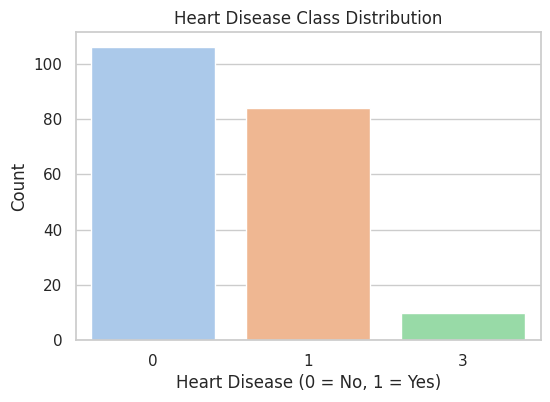

In [56]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="HeartDisease", palette="pastel")
plt.title("Heart Disease Class Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

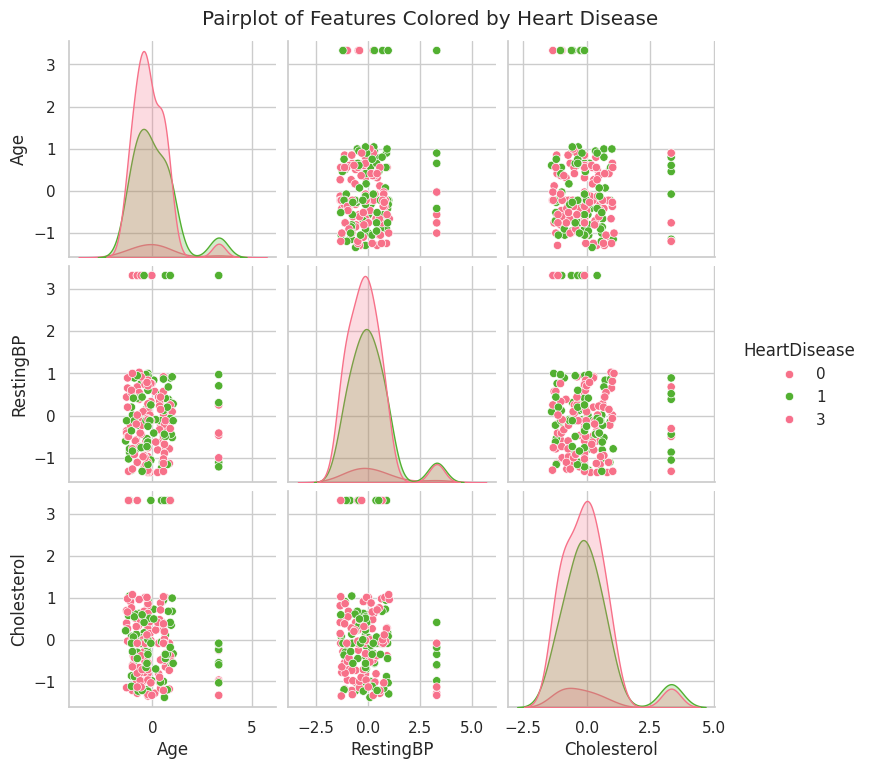

In [57]:
sns.pairplot(df[['Age', 'RestingBP', 'Cholesterol', 'HeartDisease']], hue="HeartDisease", palette="husl")
plt.suptitle("Pairplot of Features Colored by Heart Disease", y=1.02)
plt.show()

/tmp/ipython-input-58-3567404855.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


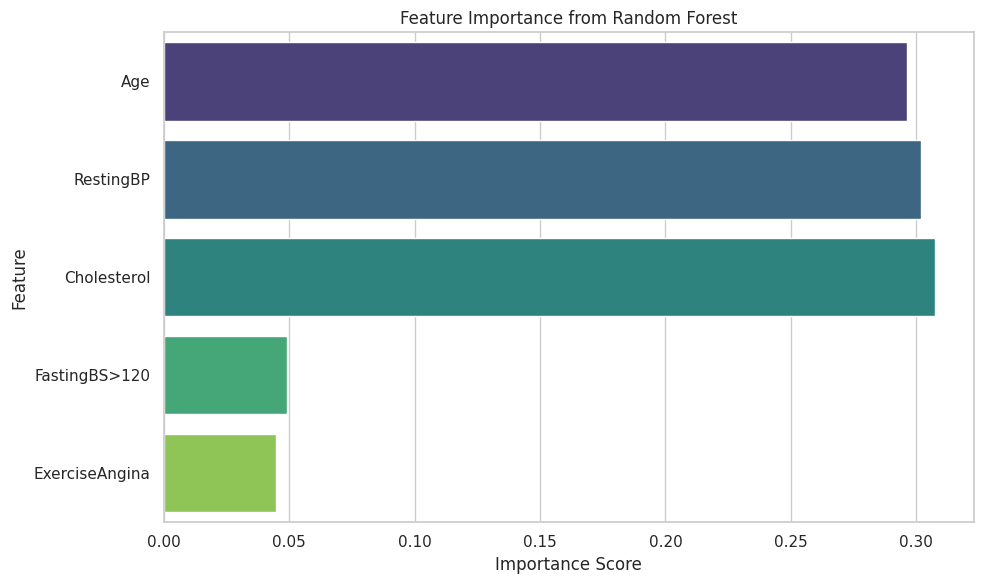

In [58]:
importances = model.feature_importances_
feature_names = X.columns


plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [61]:
print(f"Model Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}%")


Model Accuracy: 57.5%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


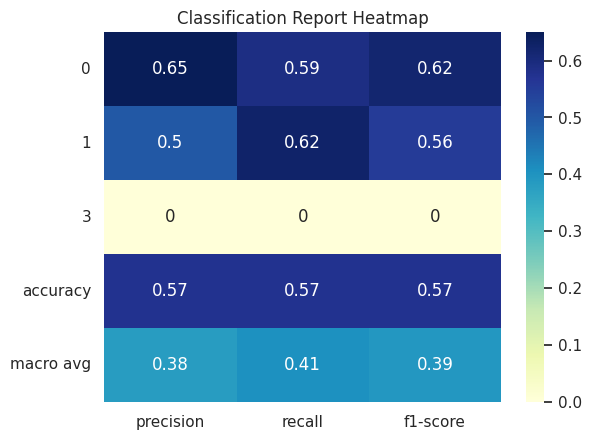

In [60]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()


/tmp/ipython-input-71-3696571279.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


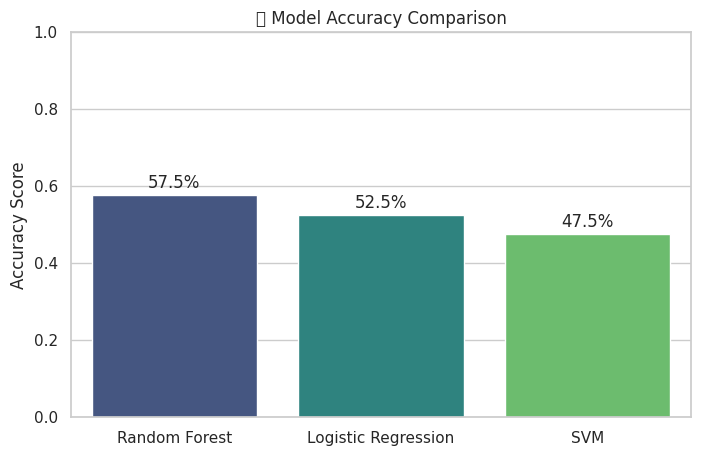

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['Random Forest', 'Logistic Regression', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, log_pred),
    accuracy_score(y_test, svm_pred)
]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("🔍 Model Accuracy Comparison")
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc*100:.1f}%", ha='center', fontsize=12)
plt.show()
